Una serie de tiempo es una secuencia de observaciones tomadas secuencialmente en el tiempo. Una determinada variable varía con el tiempo, y nosotros analizamos los patrones en ella e intentamos hacer predicciones basándonos en las variaciones que la serie ha mostrado en el pasado.

Hay que tener en cuenta ciertas propiedades de las series temporales:

- Tendencias: Un movimiento general ascendente o descendente de la variable a lo largo del tiempo.
- Estacionalidad: Un componente periódico de la serie temporal, en la que un determinado patrón se repite cada pocas unidades de tiempo.
- Residuales: Los componentes ruidosos de una serie temporal.
La descomposición de una serie temporal en estos componentes puede proporcionarnos mucha información sobre su comportamiento.

In [1]:
import pandas as pd
import os
import plotly.express as px
import json
from utils import get_itslive, get_processed_data, get_future_dates

In [6]:
with open("glaciares.json") as f:
    glaciares = json.load(f)

coords = glaciares["Svalvard - Storiestrømmen"]

df = get_itslive([coords])
glacier = get_processed_data(df)

split_idx = int(len(glacier) * 0.66)
X = glacier[['mid_date','year', 'month', 'dayofyear']]
y = glacier['v']
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

original xy [24.64783, 79.50065] 4326 maps to datacube (1069237.122305533, -396629.9954253988) EPSG:3413


/Users/roicort/GitHub/F-VICE/its_live/datacube_tools.py:283: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ins3xr = xr.open_dataset(


<Axes: xlabel='mid_date'>

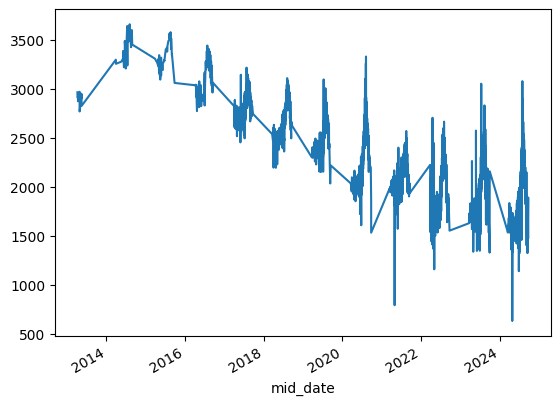

In [13]:
series = glacier['v']
series.index = glacier['mid_date']
series.plot()

In [14]:
series

mid_date
2013-04-06 12:04:27.744777984+00:00    2966
2013-04-08 00:12:49.831752960+00:00    2927
2013-04-10 00:07:32.405126912+00:00    2907
2013-04-11 12:15:54.492101888+00:00    2916
2013-04-11 23:55:23.741949952+00:00    2929
                                       ... 
2024-09-12 12:46:59.240907008+00:00    1326
2024-09-15 11:45:44.801718784+00:00    1593
2024-09-16 11:39:29.843013888+00:00    1557
2024-09-19 11:45:42.819248640+00:00    1893
2024-09-20 11:39:28.126324224+00:00    1483
Name: v, Length: 6014, dtype: int64